In [36]:
# Import packages
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from features_functions import compute_features

from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from scipy.io import wavfile
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

In [37]:
# Set the paths to the files 
data_path = "Data/"

In [58]:
# Names of the classes
classes_paths = ["Cars/", "Trucks/"]
classes_names = ["car", "truck"]
cars_list = [4,5,7,9,10,15,20,21,23,26,30,38,39,44,46,48,51,52,53,57] # ne pas changer
trucks_list = [2,4,10,11,13,20,22,25,27,30,31,32,33,35,36,39,40,45,47,48] # ne pas changer
nbr_of_sigs = 20 # Nbr of sigs in each class, à ne pas changer
seq_length = 0.6 # Nbr of second of signal for one sequence
nbr_of_obs = int(nbr_of_sigs*10/seq_length) # Each signal is 10 s long

In [39]:
# Go to search for the files
learning_labels = []
for i in range(2*nbr_of_sigs):
    if i < nbr_of_sigs:
        name = f"{classes_names[0]}{cars_list[i]}.wav"
        class_path = classes_paths[0]
    else:
        name = f"{classes_names[1]}{trucks_list[i - nbr_of_sigs]}.wav"
        class_path = classes_paths[1]

    # Read the data and scale them between -1 and 1
    fs, data = sio.wavfile.read(data_path + class_path + name)
    data = data.astype(float)
    data = data/32768

    # Cut the data into sequences (we take off the last bits)
    data_length = data.shape[0]
    nbr_blocks = int((data_length/fs)/seq_length)
    seqs = data[:int(nbr_blocks*seq_length*fs)].reshape((nbr_blocks, int(seq_length*fs)))

    for k_seq, seq in enumerate(seqs):
        # Compute the signal in three domains
        sig_sq = seq**2
        sig_t = seq / np.sqrt(sig_sq.sum())
        sig_f = np.absolute(np.fft.fft(sig_t))
        sig_c = np.absolute(np.fft.fft(sig_f))

        # Compute the features and store them
        features_list = []
        N_feat, features_list = compute_features(sig_t, sig_f[:sig_t.shape[0]//2], sig_c[:sig_t.shape[0]//2], fs)
        features_vector = np.array(features_list)[np.newaxis,:]

        if k_seq == 0 and i == 0:
            learning_features = features_vector
            learning_labels.append(classes_names[0])
        elif i < nbr_of_sigs:
            learning_features = np.vstack((learning_features, features_vector))
            learning_labels.append(classes_names[0])
        else:
            learning_features = np.vstack((learning_features, features_vector))
            learning_labels.append(classes_names[1])

In [40]:
print(learning_features.shape)
print(len(learning_labels))

(1983, 71)
1983


In [51]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Separate data in train and test
X_train, X_test, y_train, y_test = train_test_split(learning_features, learning_labels, test_size=0.2, random_state=42)

# Standardize the labels
labelEncoder = preprocessing.LabelEncoder().fit(y_train)
learningLabelsStd = labelEncoder.transform(y_train)
testLabelsStd = labelEncoder.transform(y_test)

# Learn the model
models = [GaussianNB(), LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier()]
model_names = ['Naive Bayes', 'Logistic Regression', 'Decision Tree', 'Random Forest']

for model, model_name in zip(models, model_names):
    clf = model.fit(learningFeatures_scaled, learningLabelsStd)
    y_pred = clf.predict(X_test)
    scaler = preprocessing.StandardScaler(with_mean=True).fit(X_train)
    learningFeatures_scaled = scaler.transform(X_train)
    model.fit(learningFeatures_scaled, learningLabelsStd)
# Test the model
    testFeatures_scaled = scaler.transform(X_test)
    accuracy = model.score(testFeatures_scaled, testLabelsStd)
    #accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {model_name}:", accuracy)

Accuracy of Naive Bayes: 0.6120906801007556
Accuracy of Logistic Regression: 0.7380352644836272


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

Accuracy of Decision Tree: 0.7355163727959698
Accuracy of Random Forest: 0.8664987405541562


In [59]:
# test other model

from sklearn.neural_network import MLPClassifier

# Separate data in train and test
X_train, X_test, y_train, y_test = train_test_split(learning_features, learning_labels, test_size=0.2, random_state=42)

# Standardize the labels
labelEncoder = preprocessing.LabelEncoder().fit(y_train)
learningLabelsStd = labelEncoder.transform(y_train)
testLabelsStd = labelEncoder.transform(y_test)

# Learn the model
model = MLPClassifier(hidden_layer_sizes=(100,  100), max_iter=1000, alpha=1e-4, solver='sgd', verbose=10, random_state=1, learning_rate_init=.1)
scaler = preprocessing.StandardScaler(with_mean=True).fit(X_train)
learningFeatures_scaled = scaler.transform(X_train)

model.fit(learningFeatures_scaled, learningLabelsStd)

# Test the model
testFeatures_scaled = scaler.transform(X_test)

# Accuracy
accuracy = model.score(testFeatures_scaled, testLabelsStd)
print("Accuracy:", accuracy)

Iteration 1, loss = 0.62899356
Iteration 2, loss = 0.53768392
Iteration 3, loss = 0.49896909
Iteration 4, loss = 0.45783498
Iteration 5, loss = 0.41100026
Iteration 6, loss = 0.39011391
Iteration 7, loss = 0.38050009
Iteration 8, loss = 0.33857277
Iteration 9, loss = 0.32694607
Iteration 10, loss = 0.36854084
Iteration 11, loss = 0.28813745
Iteration 12, loss = 0.28569674
Iteration 13, loss = 0.23632204
Iteration 14, loss = 0.23096080
Iteration 15, loss = 0.20520117
Iteration 16, loss = 0.19863932
Iteration 17, loss = 0.24598938
Iteration 18, loss = 0.20457289
Iteration 19, loss = 0.16788800
Iteration 20, loss = 0.14993393
Iteration 21, loss = 0.18024816
Iteration 22, loss = 0.13813263
Iteration 23, loss = 0.13365025
Iteration 24, loss = 0.26542658
Iteration 25, loss = 0.37748752
Iteration 26, loss = 0.20143012
Iteration 27, loss = 0.16280367
Iteration 28, loss = 0.13945990
Iteration 29, loss = 0.12742604
Iteration 30, loss = 0.11043916
Iteration 31, loss = 0.10571442
Iteration 32, los

Iteration 1, loss = 0.76700322
Iteration 2, loss = 0.65019717
Iteration 3, loss = 0.60684778
Iteration 4, loss = 0.55903652
Iteration 5, loss = 0.52414630
Iteration 6, loss = 0.50166696
Iteration 7, loss = 0.48434058
Iteration 8, loss = 0.46953822
Iteration 9, loss = 0.45482008
Iteration 10, loss = 0.43943126
Iteration 11, loss = 0.42349687
Iteration 12, loss = 0.40720203
Iteration 13, loss = 0.39043952
Iteration 14, loss = 0.37372436
Iteration 15, loss = 0.35690307
Iteration 16, loss = 0.34014430
Iteration 17, loss = 0.32351894
Iteration 18, loss = 0.30646359
Iteration 19, loss = 0.28949203
Iteration 20, loss = 0.27259490
Iteration 21, loss = 0.25571365
Iteration 22, loss = 0.23907320
Iteration 23, loss = 0.22261699
Iteration 24, loss = 0.20657307
Iteration 25, loss = 0.19103483
Iteration 26, loss = 0.17598480
Iteration 27, loss = 0.16165651
Iteration 28, loss = 0.14798217
Iteration 29, loss = 0.13496998
Iteration 30, loss = 0.12274297
Iteration 31, loss = 0.11126938
Iteration 32, los

Iteration 99, loss = 0.00307185
Iteration 100, loss = 0.00304704
Iteration 101, loss = 0.00296862
Iteration 102, loss = 0.00300455
Iteration 103, loss = 0.00277900
Iteration 104, loss = 0.00273086
Iteration 105, loss = 0.00268978
Iteration 106, loss = 0.00268266
Iteration 107, loss = 0.00261322
Iteration 108, loss = 0.00250232
Iteration 109, loss = 0.00265493
Iteration 110, loss = 0.00242662
Iteration 111, loss = 0.00239337
Iteration 112, loss = 0.00233860
Iteration 113, loss = 0.00229926
Iteration 114, loss = 0.00229570
Iteration 115, loss = 0.00221212
Iteration 116, loss = 0.00218131
Iteration 117, loss = 0.00214919
Iteration 118, loss = 0.00211280
Iteration 119, loss = 0.00206391
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.66271183
Iteration 2, loss = 0.56674444
Iteration 3, loss = 0.52605325
Iteration 4, loss = 0.49042063
Iteration 5, loss = 0.46319638
Iteration 6, loss = 0.43172216
Iteration 7, loss = 0.39492742
I

Iteration 82, loss = 0.00870892
Iteration 83, loss = 0.00841204
Iteration 84, loss = 0.00813555
Iteration 85, loss = 0.00787455
Iteration 86, loss = 0.00762467
Iteration 87, loss = 0.00738902
Iteration 88, loss = 0.00716881
Iteration 89, loss = 0.00695886
Iteration 90, loss = 0.00675913
Iteration 91, loss = 0.00656992
Iteration 92, loss = 0.00639025
Iteration 93, loss = 0.00622037
Iteration 94, loss = 0.00605738
Iteration 95, loss = 0.00590285
Iteration 96, loss = 0.00575744
Iteration 97, loss = 0.00561521
Iteration 98, loss = 0.00548297
Iteration 99, loss = 0.00535313
Iteration 100, loss = 0.00523234
Iteration 101, loss = 0.00511402
Iteration 102, loss = 0.00500101
Iteration 103, loss = 0.00489387
Iteration 104, loss = 0.00478984
Iteration 105, loss = 0.00468954
Iteration 106, loss = 0.00459445
Iteration 107, loss = 0.00450155
Iteration 108, loss = 0.00441393
Iteration 109, loss = 0.00432798
Iteration 110, loss = 0.00424505
Iteration 111, loss = 0.00416620
Iteration 112, loss = 0.0040

Iteration 17, loss = 0.26449204
Iteration 18, loss = 0.24240134
Iteration 19, loss = 0.22496291
Iteration 20, loss = 0.21752931
Iteration 21, loss = 0.18669087
Iteration 22, loss = 0.18888788
Iteration 23, loss = 0.18183742
Iteration 24, loss = 0.16596525
Iteration 25, loss = 0.15266687
Iteration 26, loss = 0.14985859
Iteration 27, loss = 0.25777510
Iteration 28, loss = 0.20690379
Iteration 29, loss = 0.25060017
Iteration 30, loss = 0.14508018
Iteration 31, loss = 0.13348786
Iteration 32, loss = 0.12058933
Iteration 33, loss = 0.10331718
Iteration 34, loss = 0.10015219
Iteration 35, loss = 0.08773678
Iteration 36, loss = 0.07629321
Iteration 37, loss = 0.06828040
Iteration 38, loss = 0.06848245
Iteration 39, loss = 0.06911406
Iteration 40, loss = 0.10240202
Iteration 41, loss = 0.07035209
Iteration 42, loss = 0.12670413
Iteration 43, loss = 0.45406824
Iteration 44, loss = 0.16599364
Iteration 45, loss = 0.12460947
Iteration 46, loss = 0.09747449
Iteration 47, loss = 0.08047831
Iteratio

Iteration 48, loss = 0.17667715
Iteration 49, loss = 0.15797113
Iteration 50, loss = 0.13661709
Iteration 51, loss = 0.12409408
Iteration 52, loss = 0.16009542
Iteration 53, loss = 0.19940509
Iteration 54, loss = 0.20180715
Iteration 55, loss = 0.15169796
Iteration 56, loss = 0.14727583
Iteration 57, loss = 0.16168252
Iteration 58, loss = 0.12005609
Iteration 59, loss = 0.15311776
Iteration 60, loss = 0.12537707
Iteration 61, loss = 0.13317404
Iteration 62, loss = 0.11995200
Iteration 63, loss = 0.10361590
Iteration 64, loss = 0.09684476
Iteration 65, loss = 0.10209148
Iteration 66, loss = 0.10533965
Iteration 67, loss = 0.13205355
Iteration 68, loss = 0.09475099
Iteration 69, loss = 0.11926657
Iteration 70, loss = 0.06684011
Iteration 71, loss = 0.24397406
Iteration 72, loss = 0.16317823
Iteration 73, loss = 0.20464632
Iteration 74, loss = 0.15159067
Iteration 75, loss = 0.87111606
Iteration 76, loss = 0.70593306
Iteration 77, loss = 0.21142618
Iteration 78, loss = 0.18227845
Iteratio

Iteration 94, loss = 0.00438773
Iteration 95, loss = 0.00431474
Iteration 96, loss = 0.00422594
Iteration 97, loss = 0.00406997
Iteration 98, loss = 0.00398211
Iteration 99, loss = 0.00394322
Iteration 100, loss = 0.00377924
Iteration 101, loss = 0.00368433
Iteration 102, loss = 0.00359190
Iteration 103, loss = 0.00352861
Iteration 104, loss = 0.00340423
Iteration 105, loss = 0.00336615
Iteration 106, loss = 0.00328074
Iteration 107, loss = 0.00324708
Iteration 108, loss = 0.00315575
Iteration 109, loss = 0.00310514
Iteration 110, loss = 0.00306120
Iteration 111, loss = 0.00296120
Iteration 112, loss = 0.00289662
Iteration 113, loss = 0.00285543
Iteration 114, loss = 0.00280694
Iteration 115, loss = 0.00274317
Iteration 116, loss = 0.00272127
Iteration 117, loss = 0.00264170
Iteration 118, loss = 0.00264895
Iteration 119, loss = 0.00254695
Iteration 120, loss = 0.00251408
Iteration 121, loss = 0.00246034
Iteration 122, loss = 0.00242900
Training loss did not improve more than tol=0.000

Iteration 98, loss = 0.00548297
Iteration 99, loss = 0.00535313
Iteration 100, loss = 0.00523234
Iteration 101, loss = 0.00511402
Iteration 102, loss = 0.00500101
Iteration 103, loss = 0.00489387
Iteration 104, loss = 0.00478984
Iteration 105, loss = 0.00468954
Iteration 106, loss = 0.00459445
Iteration 107, loss = 0.00450155
Iteration 108, loss = 0.00441393
Iteration 109, loss = 0.00432798
Iteration 110, loss = 0.00424505
Iteration 111, loss = 0.00416620
Iteration 112, loss = 0.00408892
Iteration 113, loss = 0.00401532
Iteration 114, loss = 0.00394329
Iteration 115, loss = 0.00387428
Iteration 116, loss = 0.00380786
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.73189190
Iteration 2, loss = 0.65242736
Iteration 3, loss = 0.57040758
Iteration 4, loss = 0.55844601
Iteration 5, loss = 0.60761879
Iteration 6, loss = 0.76139735
Iteration 7, loss = 0.58167817
Iteration 8, loss = 0.56905424
Iteration 9, loss = 0.52524296
Iterat

Iteration 46, loss = 0.04019484
Iteration 47, loss = 0.03359239
Iteration 48, loss = 0.05974011
Iteration 49, loss = 0.04878598
Iteration 50, loss = 0.04091099
Iteration 51, loss = 0.02854111
Iteration 52, loss = 0.02492274
Iteration 53, loss = 0.02331584
Iteration 54, loss = 0.01989225
Iteration 55, loss = 0.01714150
Iteration 56, loss = 0.01684416
Iteration 57, loss = 0.01527487
Iteration 58, loss = 0.01635528
Iteration 59, loss = 0.02063598
Iteration 60, loss = 0.01682381
Iteration 61, loss = 0.01324650
Iteration 62, loss = 0.01090381
Iteration 63, loss = 0.00998890
Iteration 64, loss = 0.00902757
Iteration 65, loss = 0.01685959
Iteration 66, loss = 0.01278053
Iteration 67, loss = 0.01786421
Iteration 68, loss = 0.01576045
Iteration 69, loss = 0.01020570
Iteration 70, loss = 0.01487239
Iteration 71, loss = 0.00853012
Iteration 72, loss = 0.00721531
Iteration 73, loss = 0.00744956
Iteration 74, loss = 0.00628173
Iteration 75, loss = 0.00540997
Iteration 76, loss = 0.00529570
Iteratio

Iteration 101, loss = 0.00511402
Iteration 102, loss = 0.00500101
Iteration 103, loss = 0.00489387
Iteration 104, loss = 0.00478984
Iteration 105, loss = 0.00468954
Iteration 106, loss = 0.00459445
Iteration 107, loss = 0.00450155
Iteration 108, loss = 0.00441393
Iteration 109, loss = 0.00432798
Iteration 110, loss = 0.00424505
Iteration 111, loss = 0.00416620
Iteration 112, loss = 0.00408892
Iteration 113, loss = 0.00401532
Iteration 114, loss = 0.00394329
Iteration 115, loss = 0.00387428
Iteration 116, loss = 0.00380786
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.73189190
Iteration 2, loss = 0.65242736
Iteration 3, loss = 0.57040758
Iteration 4, loss = 0.55844601
Iteration 5, loss = 0.60761879
Iteration 6, loss = 0.76139735
Iteration 7, loss = 0.58167817
Iteration 8, loss = 0.56905424
Iteration 9, loss = 0.52524296
Iteration 10, loss = 0.49058073
Iteration 11, loss = 0.50166858
Iteration 12, loss = 0.50579623
Iterati

Iteration 47, loss = 0.03574844
Iteration 48, loss = 0.06446310
Iteration 49, loss = 0.04839952
Iteration 50, loss = 0.04655376
Iteration 51, loss = 0.03289472
Iteration 52, loss = 0.02554570
Iteration 53, loss = 0.02467253
Iteration 54, loss = 0.02041262
Iteration 55, loss = 0.01967695
Iteration 56, loss = 0.01818655
Iteration 57, loss = 0.01652812
Iteration 58, loss = 0.01616169
Iteration 59, loss = 0.01645402
Iteration 60, loss = 0.01600085
Iteration 61, loss = 0.01225498
Iteration 62, loss = 0.01038718
Iteration 63, loss = 0.01004854
Iteration 64, loss = 0.00882710
Iteration 65, loss = 0.01135168
Iteration 66, loss = 0.00943068
Iteration 67, loss = 0.00894506
Iteration 68, loss = 0.00749012
Iteration 69, loss = 0.00713099
Iteration 70, loss = 0.00706538
Iteration 71, loss = 0.00647679
Iteration 72, loss = 0.00600345
Iteration 73, loss = 0.00571876
Iteration 74, loss = 0.00540658
Iteration 75, loss = 0.00519039
Iteration 76, loss = 0.00519085
Iteration 77, loss = 0.00508522
Iteratio

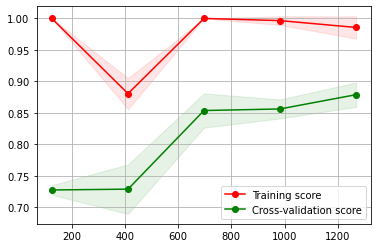

In [52]:
from sklearn.model_selection import learning_curve

model = MLPClassifier(hidden_layer_sizes=(100,  100), max_iter=1000, alpha=1e-4, solver='sgd', verbose=10, random_state=1, learning_rate_init=.1)
scaler = preprocessing.StandardScaler(with_mean=True).fit(X_train)
learningFeatures_scaled = scaler.transform(X_train)

# Plot learning curve
train_sizes, train_scores, test_scores = learning_curve(model, learningFeatures_scaled, learningLabelsStd, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

In [54]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter space to sample from
param_dist = {"hidden_layer_sizes": [(50, 50, 50), (100, 100), (200, 200)],
              "alpha": [0.0001, 0.001, 0.01, 0.1, 1],
              "solver": ["adam", "sgd", "lbfgs"],
              "learning_rate_init": [0.001, 0.01, 0.1, 0.2]}

# Initialize the model
mlp = MLPClassifier(max_iter=1000, random_state=42)

# Perform the random search
random_search = RandomizedSearchCV(mlp, param_distributions=param_dist, n_iter=100, cv=5, random_state=42, verbose=10)
random_search.fit(X_train, y_train)

# Print the best parameters found by the search
print("Best parameters found:", random_search.best_params_)

# Test the best model
best_model = random_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5; 1/100] START alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=sgd
[CV 1/5; 1/100] END alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=sgd;, score=0.500 total time=   0.2s
[CV 2/5; 1/100] START alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=sgd
[CV 2/5; 1/100] END alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=sgd;, score=0.498 total time=   0.2s
[CV 3/5; 1/100] START alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=sgd
[CV 3/5; 1/100] END alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=sgd;, score=0.498 total time=   0.2s
[CV 4/5; 1/100] START alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=sgd
[CV 4/5; 1/100] END alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=sgd;, score=0.505 total time=   0.

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 3/100] END alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=adam;, score=0.500 total time=  20.7s
[CV 2/5; 3/100] START alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=adam


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 3/100] END alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=adam;, score=0.502 total time=  21.7s
[CV 3/5; 3/100] START alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=adam


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 3/100] END alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=adam;, score=0.502 total time=  18.9s
[CV 4/5; 3/100] START alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=adam


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 3/100] END alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=adam;, score=0.502 total time=  19.2s
[CV 5/5; 3/100] START alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=adam
[CV 5/5; 3/100] END alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=adam;, score=0.502 total time=  21.7s
[CV 1/5; 4/100] START alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam
[CV 1/5; 4/100] END alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam;, score=0.566 total time=   3.0s
[CV 2/5; 4/100] START alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam
[CV 2/5; 4/100] END alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam;, score=0.502 total time=   0.3s
[CV 3/5; 4/100] START alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam
[CV 3/5; 4/100] END alpha=0.01, hidden_layer_sizes=(50, 50, 5

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5; 8/100] END alpha=0.001, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=lbfgs;, score=0.849 total time=  52.4s
[CV 2/5; 8/100] START alpha=0.001, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=lbfgs
[CV 2/5; 8/100] END alpha=0.001, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=lbfgs;, score=0.836 total time=  50.7s
[CV 3/5; 8/100] START alpha=0.001, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5; 8/100] END alpha=0.001, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=lbfgs;, score=0.826 total time=  57.9s
[CV 4/5; 8/100] START alpha=0.001, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5; 8/100] END alpha=0.001, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=lbfgs;, score=0.839 total time=  51.5s
[CV 5/5; 8/100] START alpha=0.001, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5; 8/100] END alpha=0.001, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=lbfgs;, score=0.833 total time=  59.8s
[CV 1/5; 9/100] START alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5; 9/100] END alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=lbfgs;, score=0.836 total time=  13.6s
[CV 2/5; 9/100] START alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5; 9/100] END alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=lbfgs;, score=0.839 total time=  13.5s
[CV 3/5; 9/100] START alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5; 9/100] END alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=lbfgs;, score=0.817 total time=  14.4s
[CV 4/5; 9/100] START alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5; 9/100] END alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=lbfgs;, score=0.795 total time=  13.6s
[CV 5/5; 9/100] START alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5; 9/100] END alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=lbfgs;, score=0.814 total time=  12.7s
[CV 1/5; 10/100] START alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=sgd
[CV 1/5; 10/100] END alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=sgd;, score=0.500 total time=   0.1s
[CV 2/5; 10/100] START alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=sgd
[CV 2/5; 10/100] END alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=sgd;, score=0.498 total time=   0.1s
[CV 3/5; 10/100] START alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=sgd
[CV 3/5; 10/100] END alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=sgd;, score=0.502 total time=   0.1s
[CV 4/5; 10/100] START alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=sgd
[CV 4/5; 10/100] END alpha=0.1, hidden_layer_sizes=(50, 50

[CV 5/5; 16/100] END alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=sgd;, score=0.498 total time=   0.3s
[CV 1/5; 17/100] START alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=adam
[CV 1/5; 17/100] END alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=adam;, score=0.755 total time=   1.5s
[CV 2/5; 17/100] START alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=adam
[CV 2/5; 17/100] END alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=adam;, score=0.751 total time=   1.2s
[CV 3/5; 17/100] START alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=adam
[CV 3/5; 17/100] END alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=adam;, score=0.716 total time=   1.7s
[CV 4/5; 17/100] START alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=adam
[CV 4/5; 17/100] END alpha=0.001, hidden_lay

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5; 18/100] END alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=lbfgs;, score=0.799 total time=  19.0s
[CV 2/5; 18/100] START alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5; 18/100] END alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=lbfgs;, score=0.798 total time=  22.4s
[CV 3/5; 18/100] START alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5; 18/100] END alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=lbfgs;, score=0.795 total time=  18.6s
[CV 4/5; 18/100] START alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5; 18/100] END alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=lbfgs;, score=0.789 total time=  19.7s
[CV 5/5; 18/100] START alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5; 18/100] END alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=lbfgs;, score=0.823 total time=  18.7s
[CV 1/5; 19/100] START alpha=0.01, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, solver=adam
[CV 1/5; 19/100] END alpha=0.01, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, solver=adam;, score=0.739 total time=   1.3s
[CV 2/5; 19/100] START alpha=0.01, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, solver=adam
[CV 2/5; 19/100] END alpha=0.01, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, solver=adam;, score=0.694 total time=   1.4s
[CV 3/5; 19/100] START alpha=0.01, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, solver=adam
[CV 3/5; 19/100] END alpha=0.01, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, solver=adam;, score=0.574 total time=   1.8s
[CV 4/5; 19/100] START alpha=0.01, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, solver=adam
[CV 4/5; 19/100] END alpha=0.01, hidden_layer

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5; 20/100] END alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=lbfgs;, score=0.786 total time=  19.9s
[CV 2/5; 20/100] START alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5; 20/100] END alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=lbfgs;, score=0.826 total time=  22.0s
[CV 3/5; 20/100] START alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5; 20/100] END alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=lbfgs;, score=0.808 total time=  21.0s
[CV 4/5; 20/100] START alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5; 20/100] END alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=lbfgs;, score=0.789 total time=  22.8s
[CV 5/5; 20/100] START alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5; 20/100] END alpha=0.001, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=lbfgs;, score=0.833 total time=  19.8s
[CV 1/5; 21/100] START alpha=0.01, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, solver=sgd
[CV 1/5; 21/100] END alpha=0.01, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, solver=sgd;, score=0.500 total time=   0.5s
[CV 2/5; 21/100] START alpha=0.01, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, solver=sgd
[CV 2/5; 21/100] END alpha=0.01, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, solver=sgd;, score=0.498 total time=   0.5s
[CV 3/5; 21/100] START alpha=0.01, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, solver=sgd
[CV 3/5; 21/100] END alpha=0.01, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, solver=sgd;, score=0.502 total time=   0.6s
[CV 4/5; 21/100] START alpha=0.01, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, solver=sgd
[CV 4/5; 21/100] END alpha=0.01, hidden_layer_sizes

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5; 23/100] END alpha=0.1, hidden_layer_sizes=(200, 200), learning_rate_init=0.2, solver=lbfgs;, score=0.836 total time=  49.1s
[CV 2/5; 23/100] START alpha=0.1, hidden_layer_sizes=(200, 200), learning_rate_init=0.2, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5; 23/100] END alpha=0.1, hidden_layer_sizes=(200, 200), learning_rate_init=0.2, solver=lbfgs;, score=0.839 total time=  47.5s
[CV 3/5; 23/100] START alpha=0.1, hidden_layer_sizes=(200, 200), learning_rate_init=0.2, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5; 23/100] END alpha=0.1, hidden_layer_sizes=(200, 200), learning_rate_init=0.2, solver=lbfgs;, score=0.836 total time=  53.5s
[CV 4/5; 23/100] START alpha=0.1, hidden_layer_sizes=(200, 200), learning_rate_init=0.2, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5; 23/100] END alpha=0.1, hidden_layer_sizes=(200, 200), learning_rate_init=0.2, solver=lbfgs;, score=0.855 total time=  56.7s
[CV 5/5; 23/100] START alpha=0.1, hidden_layer_sizes=(200, 200), learning_rate_init=0.2, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5; 23/100] END alpha=0.1, hidden_layer_sizes=(200, 200), learning_rate_init=0.2, solver=lbfgs;, score=0.845 total time=  52.6s
[CV 1/5; 24/100] START alpha=0.0001, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=adam
[CV 1/5; 24/100] END alpha=0.0001, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=adam;, score=0.500 total time=   0.5s
[CV 2/5; 24/100] START alpha=0.0001, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=adam
[CV 2/5; 24/100] END alpha=0.0001, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=adam;, score=0.502 total time=   0.5s
[CV 3/5; 24/100] START alpha=0.0001, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=adam
[CV 3/5; 24/100] END alpha=0.0001, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=adam;, score=0.502 total time=   0.4s
[CV 4/5; 24/100] START alpha=0.0001, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=adam
[CV 4/5; 24/100] END alpha=0.0001, hidden_laye

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5; 30/100] END alpha=1, hidden_layer_sizes=(200, 200), learning_rate_init=0.01, solver=lbfgs;, score=0.833 total time=  46.7s
[CV 2/5; 30/100] START alpha=1, hidden_layer_sizes=(200, 200), learning_rate_init=0.01, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5; 30/100] END alpha=1, hidden_layer_sizes=(200, 200), learning_rate_init=0.01, solver=lbfgs;, score=0.833 total time= 1.4min
[CV 3/5; 30/100] START alpha=1, hidden_layer_sizes=(200, 200), learning_rate_init=0.01, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5; 30/100] END alpha=1, hidden_layer_sizes=(200, 200), learning_rate_init=0.01, solver=lbfgs;, score=0.820 total time=  49.5s
[CV 4/5; 30/100] START alpha=1, hidden_layer_sizes=(200, 200), learning_rate_init=0.01, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5; 30/100] END alpha=1, hidden_layer_sizes=(200, 200), learning_rate_init=0.01, solver=lbfgs;, score=0.836 total time=  47.6s
[CV 5/5; 30/100] START alpha=1, hidden_layer_sizes=(200, 200), learning_rate_init=0.01, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5; 30/100] END alpha=1, hidden_layer_sizes=(200, 200), learning_rate_init=0.01, solver=lbfgs;, score=0.839 total time=  53.8s
[CV 1/5; 31/100] START alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd
[CV 1/5; 31/100] END alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd;, score=0.500 total time=   0.2s
[CV 2/5; 31/100] START alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd
[CV 2/5; 31/100] END alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd;, score=0.505 total time=   0.2s
[CV 3/5; 31/100] START alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd
[CV 3/5; 31/100] END alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd;, score=0.502 total time=   0.2s
[CV 4/5; 31/100] START alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=sgd
[CV 4/5; 31/100] END alpha=0.1, hidden_layer_si

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5; 33/100] END alpha=0.1, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=lbfgs;, score=0.836 total time=  53.0s
[CV 2/5; 33/100] START alpha=0.1, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5; 33/100] END alpha=0.1, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=lbfgs;, score=0.839 total time= 1.0min
[CV 3/5; 33/100] START alpha=0.1, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5; 33/100] END alpha=0.1, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=lbfgs;, score=0.836 total time=  57.2s
[CV 4/5; 33/100] START alpha=0.1, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5; 33/100] END alpha=0.1, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=lbfgs;, score=0.855 total time= 1.0min
[CV 5/5; 33/100] START alpha=0.1, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5; 33/100] END alpha=0.1, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=lbfgs;, score=0.845 total time= 1.1min
[CV 1/5; 34/100] START alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=adam
[CV 1/5; 34/100] END alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=adam;, score=0.500 total time=   9.2s
[CV 2/5; 34/100] START alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=adam
[CV 2/5; 34/100] END alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=adam;, score=0.502 total time=   0.3s
[CV 3/5; 34/100] START alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=adam
[CV 3/5; 34/100] END alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=adam;, score=0.502 total time=   0.3s
[CV 4/5; 34/100] START alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=adam
[CV 4/5; 34/100] END alpha=0.1, hidden_layer_sizes=(100, 100), lear

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5; 36/100] END alpha=0.0001, hidden_layer_sizes=(200, 200), learning_rate_init=0.01, solver=lbfgs;, score=0.824 total time=  52.8s
[CV 2/5; 36/100] START alpha=0.0001, hidden_layer_sizes=(200, 200), learning_rate_init=0.01, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5; 36/100] END alpha=0.0001, hidden_layer_sizes=(200, 200), learning_rate_init=0.01, solver=lbfgs;, score=0.842 total time=  48.1s
[CV 3/5; 36/100] START alpha=0.0001, hidden_layer_sizes=(200, 200), learning_rate_init=0.01, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5; 36/100] END alpha=0.0001, hidden_layer_sizes=(200, 200), learning_rate_init=0.01, solver=lbfgs;, score=0.855 total time=  53.1s
[CV 4/5; 36/100] START alpha=0.0001, hidden_layer_sizes=(200, 200), learning_rate_init=0.01, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5; 36/100] END alpha=0.0001, hidden_layer_sizes=(200, 200), learning_rate_init=0.01, solver=lbfgs;, score=0.836 total time= 1.1min
[CV 5/5; 36/100] START alpha=0.0001, hidden_layer_sizes=(200, 200), learning_rate_init=0.01, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5; 36/100] END alpha=0.0001, hidden_layer_sizes=(200, 200), learning_rate_init=0.01, solver=lbfgs;, score=0.817 total time= 1.1min
[CV 1/5; 37/100] START alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=adam
[CV 1/5; 37/100] END alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=adam;, score=0.500 total time=   0.3s
[CV 2/5; 37/100] START alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=adam
[CV 2/5; 37/100] END alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=adam;, score=0.502 total time=   0.3s
[CV 3/5; 37/100] START alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=adam


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 37/100] END alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=adam;, score=0.502 total time=  25.9s
[CV 4/5; 37/100] START alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=adam
[CV 4/5; 37/100] END alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=adam;, score=0.498 total time=   0.3s
[CV 5/5; 37/100] START alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=adam
[CV 5/5; 37/100] END alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=adam;, score=0.502 total time=   4.2s
[CV 1/5; 38/100] START alpha=0.001, hidden_layer_sizes=(200, 200), learning_rate_init=0.01, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5; 38/100] END alpha=0.001, hidden_layer_sizes=(200, 200), learning_rate_init=0.01, solver=lbfgs;, score=0.849 total time= 1.1min
[CV 2/5; 38/100] START alpha=0.001, hidden_layer_sizes=(200, 200), learning_rate_init=0.01, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5; 38/100] END alpha=0.001, hidden_layer_sizes=(200, 200), learning_rate_init=0.01, solver=lbfgs;, score=0.836 total time= 1.1min
[CV 3/5; 38/100] START alpha=0.001, hidden_layer_sizes=(200, 200), learning_rate_init=0.01, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5; 38/100] END alpha=0.001, hidden_layer_sizes=(200, 200), learning_rate_init=0.01, solver=lbfgs;, score=0.826 total time= 1.0min
[CV 4/5; 38/100] START alpha=0.001, hidden_layer_sizes=(200, 200), learning_rate_init=0.01, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5; 38/100] END alpha=0.001, hidden_layer_sizes=(200, 200), learning_rate_init=0.01, solver=lbfgs;, score=0.839 total time= 1.0min
[CV 5/5; 38/100] START alpha=0.001, hidden_layer_sizes=(200, 200), learning_rate_init=0.01, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5; 38/100] END alpha=0.001, hidden_layer_sizes=(200, 200), learning_rate_init=0.01, solver=lbfgs;, score=0.833 total time=  60.0s
[CV 1/5; 39/100] START alpha=0.001, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=sgd
[CV 1/5; 39/100] END alpha=0.001, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=sgd;, score=0.500 total time=   0.5s
[CV 2/5; 39/100] START alpha=0.001, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=sgd
[CV 2/5; 39/100] END alpha=0.001, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=sgd;, score=0.498 total time=   0.6s
[CV 3/5; 39/100] START alpha=0.001, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=sgd
[CV 3/5; 39/100] END alpha=0.001, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=sgd;, score=0.498 total time=   0.6s
[CV 4/5; 39/100] START alpha=0.001, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=sgd
[CV 4/5; 39/100] END alpha=0.001, hidden_layer_sizes=(200

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5; 42/100] END alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=lbfgs;, score=0.796 total time=  18.8s
[CV 2/5; 42/100] START alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=lbfgs
[CV 2/5; 42/100] END alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=lbfgs;, score=0.852 total time=  17.3s
[CV 3/5; 42/100] START alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5; 42/100] END alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=lbfgs;, score=0.808 total time=  17.7s
[CV 4/5; 42/100] START alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5; 42/100] END alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=lbfgs;, score=0.789 total time=  16.7s
[CV 5/5; 42/100] START alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5; 42/100] END alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=lbfgs;, score=0.808 total time=  17.9s
[CV 1/5; 43/100] START alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=sgd
[CV 1/5; 43/100] END alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=sgd;, score=0.500 total time=   0.2s
[CV 2/5; 43/100] START alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=sgd
[CV 2/5; 43/100] END alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=sgd;, score=0.502 total time=   0.2s
[CV 3/5; 43/100] START alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=sgd
[CV 3/5; 43/100] END alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=sgd;, score=0.498 total time=   0.3s
[CV 4/5; 43/100] START alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=sgd
[CV 4/5; 43/100] END alpha=0.1, hidden_layer_sizes=(100, 100),

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5; 45/100] END alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=lbfgs;, score=0.792 total time=  24.1s
[CV 2/5; 45/100] START alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5; 45/100] END alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=lbfgs;, score=0.801 total time=  21.7s
[CV 3/5; 45/100] START alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5; 45/100] END alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=lbfgs;, score=0.776 total time=  20.9s
[CV 4/5; 45/100] START alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5; 45/100] END alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=lbfgs;, score=0.785 total time=  22.2s
[CV 5/5; 45/100] START alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5; 45/100] END alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=lbfgs;, score=0.836 total time=  29.6s
[CV 1/5; 46/100] START alpha=0.1, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, solver=adam
[CV 1/5; 46/100] END alpha=0.1, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, solver=adam;, score=0.695 total time=   2.0s
[CV 2/5; 46/100] START alpha=0.1, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, solver=adam
[CV 2/5; 46/100] END alpha=0.1, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, solver=adam;, score=0.634 total time=   2.0s
[CV 3/5; 46/100] START alpha=0.1, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, solver=adam
[CV 3/5; 46/100] END alpha=0.1, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, solver=adam;, score=0.751 total time=   2.0s
[CV 4/5; 46/100] START alpha=0.1, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, solver=adam
[CV 4/5; 46/100] END alpha=0.1, hidden_layer_sizes=(20

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5; 48/100] END alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=lbfgs;, score=0.796 total time=  26.0s
[CV 2/5; 48/100] START alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5; 48/100] END alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=lbfgs;, score=0.852 total time=  18.1s
[CV 3/5; 48/100] START alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=lbfgs
[CV 3/5; 48/100] END alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=lbfgs;, score=0.808 total time=  19.0s
[CV 4/5; 48/100] START alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5; 48/100] END alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=lbfgs;, score=0.789 total time=  18.6s
[CV 5/5; 48/100] START alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5; 48/100] END alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=lbfgs;, score=0.808 total time=  18.5s
[CV 1/5; 49/100] START alpha=1, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, solver=sgd
[CV 1/5; 49/100] END alpha=1, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, solver=sgd;, score=0.500 total time=   0.6s
[CV 2/5; 49/100] START alpha=1, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, solver=sgd
[CV 2/5; 49/100] END alpha=1, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, solver=sgd;, score=0.502 total time=   0.5s
[CV 3/5; 49/100] START alpha=1, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, solver=sgd
[CV 3/5; 49/100] END alpha=1, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, solver=sgd;, score=0.498 total time=   0.6s
[CV 4/5; 49/100] START alpha=1, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, solver=sgd
[CV 4/5; 49/100] END alpha=1, hidden_layer_sizes=(200, 200), learnin

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5; 53/100] END alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=lbfgs;, score=0.799 total time=  24.6s
[CV 2/5; 53/100] START alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5; 53/100] END alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=lbfgs;, score=0.808 total time=  13.4s
[CV 3/5; 53/100] START alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5; 53/100] END alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=lbfgs;, score=0.811 total time=  16.5s
[CV 4/5; 53/100] START alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5; 53/100] END alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=lbfgs;, score=0.801 total time=  15.6s
[CV 5/5; 53/100] START alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5; 53/100] END alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=lbfgs;, score=0.820 total time=  16.3s
[CV 1/5; 54/100] START alpha=1, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5; 54/100] END alpha=1, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=lbfgs;, score=0.833 total time=  58.8s
[CV 2/5; 54/100] START alpha=1, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5; 54/100] END alpha=1, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=lbfgs;, score=0.833 total time= 1.1min
[CV 3/5; 54/100] START alpha=1, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5; 54/100] END alpha=1, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=lbfgs;, score=0.820 total time=  58.1s
[CV 4/5; 54/100] START alpha=1, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5; 54/100] END alpha=1, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=lbfgs;, score=0.836 total time=  59.3s
[CV 5/5; 54/100] START alpha=1, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5; 54/100] END alpha=1, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=lbfgs;, score=0.839 total time=  58.0s
[CV 1/5; 55/100] START alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=sgd
[CV 1/5; 55/100] END alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=sgd;, score=0.500 total time=   0.2s
[CV 2/5; 55/100] START alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=sgd
[CV 2/5; 55/100] END alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=sgd;, score=0.498 total time=   0.3s
[CV 3/5; 55/100] START alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=sgd
[CV 3/5; 55/100] END alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=sgd;, score=0.502 total time=   0.2s
[CV 4/5; 55/100] START alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=sgd
[CV 4/5; 55/100] END alpha=0.001, hidden_layer_s

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5; 57/100] END alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=lbfgs;, score=0.843 total time=  17.0s
[CV 2/5; 57/100] START alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5; 57/100] END alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=lbfgs;, score=0.804 total time=  17.3s
[CV 3/5; 57/100] START alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5; 57/100] END alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=lbfgs;, score=0.792 total time=  16.7s
[CV 4/5; 57/100] START alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5; 57/100] END alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=lbfgs;, score=0.779 total time=  17.6s
[CV 5/5; 57/100] START alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5; 57/100] END alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=lbfgs;, score=0.830 total time=  17.4s
[CV 1/5; 58/100] START alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=sgd
[CV 1/5; 58/100] END alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=sgd;, score=0.500 total time=   0.3s
[CV 2/5; 58/100] START alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=sgd
[CV 2/5; 58/100] END alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=sgd;, score=0.498 total time=   0.3s
[CV 3/5; 58/100] START alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=sgd
[CV 3/5; 58/100] END alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=sgd;, score=0.502 total time=   0.2s
[CV 4/5; 58/100] START alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=sgd
[CV 4/5; 58/100] END alpha=0.01, hidden_layer_sizes=(

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5; 60/100] END alpha=0.0001, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, solver=lbfgs;, score=0.824 total time=  59.4s
[CV 2/5; 60/100] START alpha=0.0001, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5; 60/100] END alpha=0.0001, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, solver=lbfgs;, score=0.842 total time= 1.1min
[CV 3/5; 60/100] START alpha=0.0001, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5; 60/100] END alpha=0.0001, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, solver=lbfgs;, score=0.855 total time=  59.0s
[CV 4/5; 60/100] START alpha=0.0001, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5; 60/100] END alpha=0.0001, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, solver=lbfgs;, score=0.836 total time=  57.5s
[CV 5/5; 60/100] START alpha=0.0001, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5; 60/100] END alpha=0.0001, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, solver=lbfgs;, score=0.817 total time=293.5min
[CV 1/5; 61/100] START alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5; 61/100] END alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=lbfgs;, score=0.843 total time=   5.9s
[CV 2/5; 61/100] START alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5; 61/100] END alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=lbfgs;, score=0.804 total time=   5.7s
[CV 3/5; 61/100] START alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5; 61/100] END alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=lbfgs;, score=0.792 total time=   5.5s
[CV 4/5; 61/100] START alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5; 61/100] END alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=lbfgs;, score=0.779 total time=   4.8s
[CV 5/5; 61/100] START alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5; 61/100] END alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=lbfgs;, score=0.830 total time=   5.3s
[CV 1/5; 62/100] START alpha=0.01, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5; 62/100] END alpha=0.01, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, solver=lbfgs;, score=0.824 total time=  20.6s
[CV 2/5; 62/100] START alpha=0.01, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5; 62/100] END alpha=0.01, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, solver=lbfgs;, score=0.842 total time=  20.0s
[CV 3/5; 62/100] START alpha=0.01, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5; 62/100] END alpha=0.01, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, solver=lbfgs;, score=0.836 total time=  19.5s
[CV 4/5; 62/100] START alpha=0.01, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5; 62/100] END alpha=0.01, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, solver=lbfgs;, score=0.845 total time=  20.5s
[CV 5/5; 62/100] START alpha=0.01, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5; 62/100] END alpha=0.01, hidden_layer_sizes=(200, 200), learning_rate_init=0.001, solver=lbfgs;, score=0.849 total time=  20.3s
[CV 1/5; 63/100] START alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=adam
[CV 1/5; 63/100] END alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=adam;, score=0.748 total time=   0.3s
[CV 2/5; 63/100] START alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=adam
[CV 2/5; 63/100] END alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=adam;, score=0.741 total time=   0.5s
[CV 3/5; 63/100] START alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=adam
[CV 3/5; 63/100] END alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=adam;, score=0.776 total time=   0.3s
[CV 4/5; 63/100] START alpha=0.1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=adam
[CV 4/5; 63/100] END alpha=0.1, hidden_laye

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5; 66/100] END alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=lbfgs;, score=0.792 total time=   7.4s
[CV 2/5; 66/100] START alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5; 66/100] END alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=lbfgs;, score=0.801 total time=   6.5s
[CV 3/5; 66/100] START alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5; 66/100] END alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=lbfgs;, score=0.776 total time=   7.2s
[CV 4/5; 66/100] START alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5; 66/100] END alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=lbfgs;, score=0.785 total time=   8.0s
[CV 5/5; 66/100] START alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5; 66/100] END alpha=1, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=lbfgs;, score=0.836 total time=   8.4s
[CV 1/5; 67/100] START alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.2, solver=sgd
[CV 1/5; 67/100] END alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.2, solver=sgd;, score=0.500 total time=   0.0s
[CV 2/5; 67/100] START alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.2, solver=sgd
[CV 2/5; 67/100] END alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.2, solver=sgd;, score=0.498 total time=   0.0s
[CV 3/5; 67/100] START alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.2, solver=sgd
[CV 3/5; 67/100] END alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.2, solver=sgd;, score=0.498 total time=   0.0s
[CV 4/5; 67/100] START alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.2, solver=sgd
[CV 4/5; 67/100] END alpha=0.0001, hidden_layer_sizes=(

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5; 68/100] END alpha=0.01, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=lbfgs;, score=0.824 total time=  22.9s
[CV 2/5; 68/100] START alpha=0.01, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5; 68/100] END alpha=0.01, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=lbfgs;, score=0.842 total time=  22.3s
[CV 3/5; 68/100] START alpha=0.01, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5; 68/100] END alpha=0.01, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=lbfgs;, score=0.836 total time=  20.1s
[CV 4/5; 68/100] START alpha=0.01, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5; 68/100] END alpha=0.01, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=lbfgs;, score=0.845 total time=  20.2s
[CV 5/5; 68/100] START alpha=0.01, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5; 68/100] END alpha=0.01, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=lbfgs;, score=0.849 total time=  19.6s
[CV 1/5; 69/100] START alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=adam
[CV 1/5; 69/100] END alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=adam;, score=0.733 total time=   0.5s
[CV 2/5; 69/100] START alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=adam
[CV 2/5; 69/100] END alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=adam;, score=0.700 total time=   0.4s
[CV 3/5; 69/100] START alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=adam
[CV 3/5; 69/100] END alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=adam;, score=0.713 total time=   0.5s
[CV 4/5; 69/100] START alpha=0.01, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01, solver=adam
[CV 4/5; 69/100] END alpha=0.01, hidde

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5; 70/100] END alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=lbfgs;, score=0.843 total time=   5.1s
[CV 2/5; 70/100] START alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5; 70/100] END alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=lbfgs;, score=0.804 total time=   4.7s
[CV 3/5; 70/100] START alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5; 70/100] END alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=lbfgs;, score=0.792 total time=   4.7s
[CV 4/5; 70/100] START alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5; 70/100] END alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=lbfgs;, score=0.779 total time=   5.1s
[CV 5/5; 70/100] START alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5; 70/100] END alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=lbfgs;, score=0.830 total time=   4.9s
[CV 1/5; 71/100] START alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5; 71/100] END alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=lbfgs;, score=0.799 total time=   4.9s
[CV 2/5; 71/100] START alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5; 71/100] END alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=lbfgs;, score=0.808 total time=   5.1s
[CV 3/5; 71/100] START alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5; 71/100] END alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=lbfgs;, score=0.811 total time=   4.5s
[CV 4/5; 71/100] START alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5; 71/100] END alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=lbfgs;, score=0.801 total time=   4.6s
[CV 5/5; 71/100] START alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5; 71/100] END alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=lbfgs;, score=0.820 total time=   5.3s
[CV 1/5; 72/100] START alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam
[CV 1/5; 72/100] END alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam;, score=0.500 total time=   0.0s
[CV 2/5; 72/100] START alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam
[CV 2/5; 72/100] END alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam;, score=0.502 total time=   0.1s
[CV 3/5; 72/100] START alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam
[CV 3/5; 72/100] END alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam;, score=0.502 total time=   0.1s
[CV 4/5; 72/100] START alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=adam
[CV 4/5; 72/100] END alpha=

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5; 76/100] END alpha=0.0001, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=lbfgs;, score=0.824 total time=  19.5s
[CV 2/5; 76/100] START alpha=0.0001, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5; 76/100] END alpha=0.0001, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=lbfgs;, score=0.842 total time=  19.8s
[CV 3/5; 76/100] START alpha=0.0001, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5; 76/100] END alpha=0.0001, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=lbfgs;, score=0.855 total time=  19.8s
[CV 4/5; 76/100] START alpha=0.0001, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5; 76/100] END alpha=0.0001, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=lbfgs;, score=0.836 total time=  19.8s
[CV 5/5; 76/100] START alpha=0.0001, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5; 76/100] END alpha=0.0001, hidden_layer_sizes=(200, 200), learning_rate_init=0.1, solver=lbfgs;, score=0.817 total time=  20.1s
[CV 1/5; 77/100] START alpha=0.01, hidden_layer_sizes=(200, 200), learning_rate_init=0.01, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5; 77/100] END alpha=0.01, hidden_layer_sizes=(200, 200), learning_rate_init=0.01, solver=lbfgs;, score=0.824 total time=  19.9s
[CV 2/5; 77/100] START alpha=0.01, hidden_layer_sizes=(200, 200), learning_rate_init=0.01, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5; 77/100] END alpha=0.01, hidden_layer_sizes=(200, 200), learning_rate_init=0.01, solver=lbfgs;, score=0.842 total time=  20.4s
[CV 3/5; 77/100] START alpha=0.01, hidden_layer_sizes=(200, 200), learning_rate_init=0.01, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5; 77/100] END alpha=0.01, hidden_layer_sizes=(200, 200), learning_rate_init=0.01, solver=lbfgs;, score=0.836 total time=  19.3s
[CV 4/5; 77/100] START alpha=0.01, hidden_layer_sizes=(200, 200), learning_rate_init=0.01, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5; 77/100] END alpha=0.01, hidden_layer_sizes=(200, 200), learning_rate_init=0.01, solver=lbfgs;, score=0.845 total time=  19.9s
[CV 5/5; 77/100] START alpha=0.01, hidden_layer_sizes=(200, 200), learning_rate_init=0.01, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5; 77/100] END alpha=0.01, hidden_layer_sizes=(200, 200), learning_rate_init=0.01, solver=lbfgs;, score=0.849 total time=  20.0s
[CV 1/5; 78/100] START alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5; 78/100] END alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=lbfgs;, score=0.799 total time=   7.2s
[CV 2/5; 78/100] START alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5; 78/100] END alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=lbfgs;, score=0.798 total time=   6.6s
[CV 3/5; 78/100] START alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5; 78/100] END alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=lbfgs;, score=0.795 total time=   7.4s
[CV 4/5; 78/100] START alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5; 78/100] END alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=lbfgs;, score=0.789 total time=   6.7s
[CV 5/5; 78/100] START alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5; 78/100] END alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.1, solver=lbfgs;, score=0.823 total time=   7.8s
[CV 1/5; 79/100] START alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.2, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5; 79/100] END alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.2, solver=lbfgs;, score=0.811 total time=   7.7s
[CV 2/5; 79/100] START alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.2, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5; 79/100] END alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.2, solver=lbfgs;, score=0.808 total time=   7.7s
[CV 3/5; 79/100] START alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.2, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5; 79/100] END alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.2, solver=lbfgs;, score=0.826 total time=   7.1s
[CV 4/5; 79/100] START alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.2, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5; 79/100] END alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.2, solver=lbfgs;, score=0.792 total time=   7.4s
[CV 5/5; 79/100] START alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.2, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5; 79/100] END alpha=0.01, hidden_layer_sizes=(100, 100), learning_rate_init=0.2, solver=lbfgs;, score=0.820 total time=   6.5s
[CV 1/5; 80/100] START alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=sgd
[CV 1/5; 80/100] END alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=sgd;, score=0.500 total time=   0.0s
[CV 2/5; 80/100] START alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=sgd
[CV 2/5; 80/100] END alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=sgd;, score=0.498 total time=   0.0s
[CV 3/5; 80/100] START alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=sgd
[CV 3/5; 80/100] END alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=sgd;, score=0.502 total time=   0.0s
[CV 4/5; 80/100] START alpha=0.0001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.2, solver=sgd
[CV 4/5; 80/100] END alpha=0.0001, hid

[CV 5/5; 86/100] END alpha=0.001, hidden_layer_sizes=(200, 200), learning_rate_init=0.01, solver=sgd;, score=0.498 total time=   0.1s
[CV 1/5; 87/100] START alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5; 87/100] END alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=lbfgs;, score=0.796 total time=   5.5s
[CV 2/5; 87/100] START alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5; 87/100] END alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=lbfgs;, score=0.852 total time=   4.6s
[CV 3/5; 87/100] START alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5; 87/100] END alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=lbfgs;, score=0.808 total time=   4.5s
[CV 4/5; 87/100] START alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5; 87/100] END alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=lbfgs;, score=0.789 total time=   5.0s
[CV 5/5; 87/100] START alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5; 87/100] END alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.1, solver=lbfgs;, score=0.808 total time=   4.7s
[CV 1/5; 88/100] START alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=adam
[CV 1/5; 88/100] END alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=adam;, score=0.720 total time=   0.3s
[CV 2/5; 88/100] START alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=adam
[CV 2/5; 88/100] END alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=adam;, score=0.732 total time=   0.3s
[CV 3/5; 88/100] START alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=adam
[CV 3/5; 88/100] END alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=adam;, score=0.710 total time=   0.5s
[CV 4/5; 88/100] START alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate_init=0.01, solver=adam
[CV 4/5; 88/100] END alpha=0.1, hidden_layer_sizes=(100,

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5; 94/100] END alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.2, solver=lbfgs;, score=0.808 total time=   7.0s
[CV 2/5; 94/100] START alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.2, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5; 94/100] END alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.2, solver=lbfgs;, score=0.795 total time=   6.5s
[CV 3/5; 94/100] START alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.2, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5; 94/100] END alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.2, solver=lbfgs;, score=0.795 total time=   7.3s
[CV 4/5; 94/100] START alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.2, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5; 94/100] END alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.2, solver=lbfgs;, score=0.804 total time=   6.7s
[CV 5/5; 94/100] START alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.2, solver=lbfgs


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5; 94/100] END alpha=0.0001, hidden_layer_sizes=(100, 100), learning_rate_init=0.2, solver=lbfgs;, score=0.842 total time=   7.0s
[CV 1/5; 95/100] START alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam
[CV 1/5; 95/100] END alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam;, score=0.689 total time=   0.7s
[CV 2/5; 95/100] START alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam
[CV 2/5; 95/100] END alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam;, score=0.779 total time=   0.5s
[CV 3/5; 95/100] START alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam
[CV 3/5; 95/100] END alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam;, score=0.656 total time=   0.3s
[CV 4/5; 95/100] START alpha=1, hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.001, solver=adam
[CV 4/5; 95/100] END alpha=1, hidden_layer_sizes=(

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [43]:
# Separate data in train and test
X_train, X_test, y_train, y_test = train_test_split(learning_features, learning_labels, test_size=0.2, random_state=42)

# Standardize the labels
labelEncoder = preprocessing.LabelEncoder().fit(y_train)
learningLabelsStd = labelEncoder.transform(y_train)
testLabelsStd = labelEncoder.transform(y_test)

# Learn the model
model = svm.SVC(C=30, kernel='rbf', class_weight=None, probability=False)
scaler = preprocessing.StandardScaler(with_mean=True).fit(X_train)
learningFeatures_scaled = scaler.transform(X_train)

model.fit(learningFeatures_scaled, learningLabelsStd)

# Test the model
testFeatures_scaled = scaler.transform(X_test)

# Accuracy
accuracy = model.score(testFeatures_scaled, testLabelsStd)
print("Accuracy:", accuracy)

Accuracy: 0.8790931989924433


Tests

In [44]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, learning_features, learningLabelsStd, cv=5)
print(scores)
print(np.mean(scores))

ValueError: Found input variables with inconsistent numbers of samples: [1983, 1586]